In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


## CSV to Pandas DataFrame

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Create a Pandas dataframe from a Zeek log


#CSV obtained using Kibana query

df = pd.read_csv('/content/drive/MyDrive/Universita/Magistrale/Tesi/ZeekML/Logs/Timestamp.csv',parse_dates=['timestamp'])

#Thinking how to do the same thing using Pandas pivoting...
df.timestamp = df.timestamp.apply(lambda x: x.date())

pivot= df.pivot(index="timestamp", columns="destination_port", values="Count")

pivot.to_csv('foo.csv')


#Seaborn Corr heatmap


#  Evolution of S7comm-Modbus requests over time

https://github.com/amzn/zeek-plugin-s7comm/blob/master/scripts/consts.zeek

Sezione const cotp_types

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: UserWarning:

Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


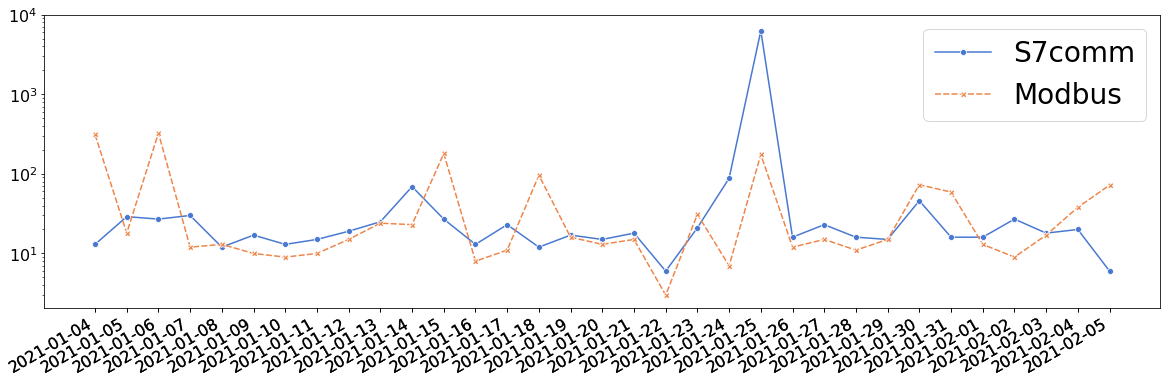

In [31]:
import seaborn
import plotly.express as px
from matplotlib import dates


!pip install tikzplotlib
import tikzplotlib
#print(zeek_df['pdu_type'].value_counts())
#zeek_df['pdu_type'].value_counts().plot.bar()


#plt.hist(zeek_df['pdu_type'], log=True) 



#table = df.pivot(index='timestamp',columns='destination_port', values='Count')
# plotly


fig, g = plt.subplots(figsize = (20,6))



g = seaborn.lineplot(x="timestamp", y="Count",hue="destination_port",style="destination_port",markers=True,data=df, palette="muted",ax=g)
#Log scale
g.set_yscale("log")

#consideer 
g.set(xticks=df['timestamp'].values)

#Show all dates x-Axis
g.xaxis.set_major_formatter(dates.DateFormatter("%Y-%m-%d"))
plt.xlabel("", size=12)
plt.ylabel("", size=12)

#set yLim to show latest label 
g.set_ylim((0.0, 10000.0))


#Rotate Labels
fig.autofmt_xdate()

#Ticks fontsize
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)



#Edit legend
plt.legend(loc='upper right', labels=['S7comm', 'Modbus'],prop={'size': 28})
plt.savefig("foo.eps", format="eps",bbox_inches='tight',transparent=True)

#Save to pgf
tikzplotlib.save("test.tex")
plt.show(g)



KeyError: ignored

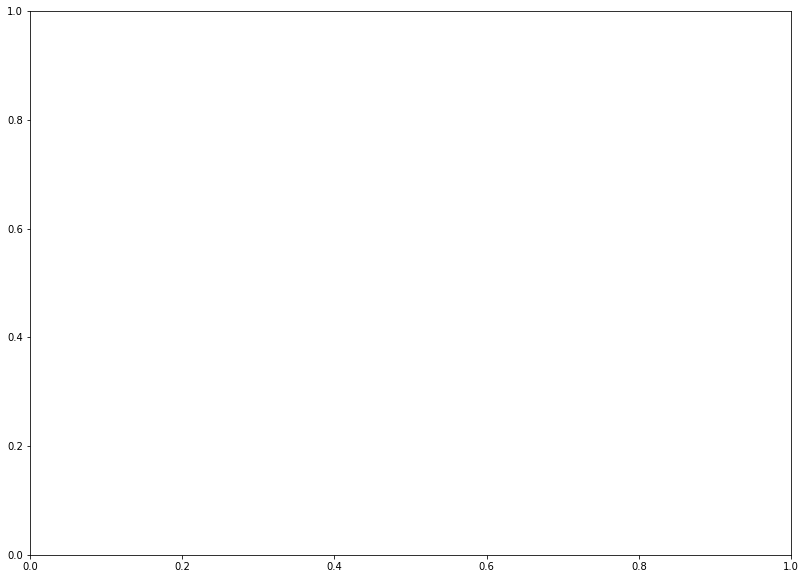

In [ ]:
#s2 = filter_df['Modbus'].to_list()
fig = plt.figure(figsize=(30,10))

fig.add_subplot(121)
sns.regplot(x="Modbus", y="S7comm", fit_reg=True, data=df);
plt.xlabel('Modbus events');
plt.ylabel('S7comm events');
plt.title('Scatterplot for the Association between Breast Cancer and Internet Usage');